In [1]:
from data_reader import LMDBReader, CCPDHelper

# your path to data
train_path = r'/home/egiby/data/Yandex.Disk2/datasets/CCPD/train.lmdb'

# Dummy baseline

## Baseline method

- Calculate most common character on each place in the gtruth
- Construct single line from them, use it as gtruth for all ids

In [2]:
import cv2
import numpy as np

### Data tools demonstration

In [3]:
train_reader = LMDBReader(train_path)
train_reader.open()
train_helper = CCPDHelper(train_reader)

In [4]:
train_helper.size()

199996

In [5]:
names = train_reader.namelist()
SEED = 42
TRAIN_PART = 0.8

In [6]:
rng = np.random.default_rng(SEED)
permutation = rng.permutation(len(names))
train_size = int(len(names) * 0.8)
train_names = [names[i] for i in permutation[:train_size]]
val_names = [names[i] for i in permutation[train_size:]]

In [7]:
train_helper = CCPDHelper(train_reader, train_names)
val_helper = CCPDHelper(train_reader, val_names)

In [8]:
img0, txt0 = train_helper.item(0)

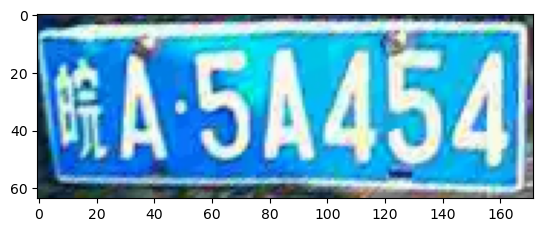

In [9]:
from matplotlib import pyplot as plt
plt.imshow(img0)

### Train helper lookup

In [10]:
from collections import Counter

counters = [Counter() for _ in range(7)]
for i in range(train_helper.size()):
    _, gtruth = train_helper.item(i)
    for place, c in enumerate(gtruth):
        counters[place].update(c)

In [11]:
gold_prediction = ''.join([counters[i].most_common(1)[0][0] for i in range(7)])
gold_prediction

'皖AY9068'

### Evaluation

In [12]:
test_path = r'/home/egiby/data/Yandex.Disk2/datasets/CCPD/test.lmdb'
pred_path = './pred.txt'

In [13]:
with open(pred_path, 'w', encoding='utf-8') as out:
    with LMDBReader(test_path) as test_reader:
        helper = CCPDHelper(test_reader)
        for i in range(helper.size()):
            img, _ = helper.item(i) # it will be 0 points if you will use gtruth from test database
            print(i, gold_prediction, file=out)

In [14]:
from course_ocr_t2.evaluate import evaluate
evaluate('./gt.txt', './pred.txt') * 100

32.022455900373316